# Part 1: Setup & Preprocessing

In [1]:
# Standard Libraries
import pandas as pd
import numpy as np
import json

# Data Preprocessing & NLP
import nltk
import re
import string
import gensim
from textblob import Word

from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
nltk.download('wordnet')
nltk.download('punkt')

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics.pairwise import linear_kernel

# Performance metrics
from surprise import SVD
from surprise.model_selection import cross_validate, train_test_split
from surprise import accuracy
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics.pairwise import cosine_similarity

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\76alp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\76alp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


ModuleNotFoundError: No module named 'textblob'

In [2]:
# file type trasformation: json to csv
df = pd.read_json('data options/arxivData.json')
df.to_csv('arxivData.csv', index='id')

In [10]:
arxivData = pd.read_csv('arxivData.csv')

In [11]:
arxivData.columns

Index(['Unnamed: 0', 'author', 'day', 'id', 'link', 'month', 'summary', 'tag',
       'title', 'year'],
      dtype='object')

In [12]:
#dropping irrelevant columns
columns_to_delete = ['Unnamed: 0', 'id', 'day', 'month']
arxivData.drop(columns_to_delete, inplace=True, axis=1)

In [13]:
arxivData.head()

,author,link,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [14]:
from ast import literal_eval
# convert 'stringfield' lists to usable structure
features = ['author', 'link', 'tag']
for feature in features:
    arxivData[feature] = arxivData[feature].apply(literal_eval)

In [15]:
arxivData.head()

,author,link,summary,tag,title,year
0,"[{'name': 'Ahmed Osman'}, {'name': 'Wojciech S...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We propose an architecture for VQA which utili...,"[{'term': 'cs.AI', 'scheme': 'http://arxiv.org...",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[{'name': 'Ji Young Lee'}, {'name': 'Franck De...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Recent approaches based on artificial neural n...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Sequential Short-Text Classification with Recu...,2016
2,"[{'name': 'Iulian Vlad Serban'}, {'name': 'Tim...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We introduce the multiresolution recurrent neu...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[{'name': 'Sebastian Ruder'}, {'name': 'Joachi...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",Multi-task learning is motivated by the observ...,"[{'term': 'stat.ML', 'scheme': 'http://arxiv.o...",Learning what to share between loosely related...,2017
4,"[{'name': 'Iulian V. Serban'}, {'name': 'Chinn...","[{'rel': 'alternate', 'href': 'http://arxiv.or...",We present MILABOT: a deep reinforcement learn...,"[{'term': 'cs.CL', 'scheme': 'http://arxiv.org...",A Deep Reinforcement Learning Chatbot,2017


In [8]:
def get_names(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

def get_link(x):
    for i in x:
        return i['href']
    
def get_tag(x):
    if isinstance(x, list):
        terms = [i['term'] for i in x]
        #Check if more than 5 elements exist. If yes, return only first five. If no, return entire list.
        if len(terms) > 5:
            terms = terms[:5]
        return terms


In [9]:
# list transformation
arxivData['author'] = arxivData['author'].apply(get_names)
arxivData['link'] = arxivData['link'].apply(get_link)
arxivData['tag'] = arxivData['tag'].apply(get_tag)

In [10]:
arxivData.head()

,author,link,summary,tag,title,year
0,"[Ahmed Osman, Wojciech Samek]",http://arxiv.org/abs/1802.00209v1,We propose an architecture for VQA which utili...,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",Dual Recurrent Attention Units for Visual Ques...,2018
1,"[Ji Young Lee, Franck Dernoncourt]",http://arxiv.org/abs/1603.03827v1,Recent approaches based on artificial neural n...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Sequential Short-Text Classification with Recu...,2016
2,"[Iulian Vlad Serban, Tim Klinger, Gerald Tesauro]",http://arxiv.org/abs/1606.00776v2,We introduce the multiresolution recurrent neu...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Multiresolution Recurrent Neural Networks: An ...,2016
3,"[Sebastian Ruder, Joachim Bingel, Isabelle Aug...",http://arxiv.org/abs/1705.08142v2,Multi-task learning is motivated by the observ...,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",Learning what to share between loosely related...,2017
4,"[Iulian V. Serban, Chinnadhurai Sankar, Mathie...",http://arxiv.org/abs/1709.02349v2,We present MILABOT: a deep reinforcement learn...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",A Deep Reinforcement Learning Chatbot,2017


In [11]:
arxivData.shape

(41000, 6)

In [11]:
# Data Cleaning
def clean_text(text):
    # remove everything except alphabets
    text = re.sub("[^a-zA-Z]", " ", text)
    # remove whitespaces
    text = ' '.join(text.split())
    text = text.lower()
    
    return text

In [12]:
# creating clean text feature
features = ['title', 'summary']
for feature in features:
    arxivData['clean_' + feature] = arxivData[feature].apply(clean_text)

In [13]:
arxivData.head()

,author,link,summary,tag,title,year,clean_title,clean_summary
0,"[Ahmed Osman, Wojciech Samek]",http://arxiv.org/abs/1802.00209v1,We propose an architecture for VQA which utili...,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",Dual Recurrent Attention Units for Visual Ques...,2018,dual recurrent attention units for visual ques...,we propose an architecture for vqa which utili...
1,"[Ji Young Lee, Franck Dernoncourt]",http://arxiv.org/abs/1603.03827v1,Recent approaches based on artificial neural n...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Sequential Short-Text Classification with Recu...,2016,sequential short text classification with recu...,recent approaches based on artificial neural n...
2,"[Iulian Vlad Serban, Tim Klinger, Gerald Tesauro]",http://arxiv.org/abs/1606.00776v2,We introduce the multiresolution recurrent neu...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",Multiresolution Recurrent Neural Networks: An ...,2016,multiresolution recurrent neural networks an a...,we introduce the multiresolution recurrent neu...
3,"[Sebastian Ruder, Joachim Bingel, Isabelle Aug...",http://arxiv.org/abs/1705.08142v2,Multi-task learning is motivated by the observ...,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",Learning what to share between loosely related...,2017,learning what to share between loosely related...,multi task learning is motivated by the observ...
4,"[Iulian V. Serban, Chinnadhurai Sankar, Mathie...",http://arxiv.org/abs/1709.02349v2,We present MILABOT: a deep reinforcement learn...,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",A Deep Reinforcement Learning Chatbot,2017,a deep reinforcement learning chatbot,we present milabot a deep reinforcement learni...


# Part 2. Visualization

In [14]:
arxivData['soup'] = arxivData['clean_title'] + arxivData['clean_summary']

In [145]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * 55.0 / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()
    
    freq_dist = nltk.FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(freq_dist.keys()), 'count':list(freq_dist.values())})
    
    fig = plt.figure(figsize=(21,16))
    ax1 = fig.add_subplot(2,1,1)
    wordcloud = WordCloud(width=1000, height=300, background_color='black', 
                          max_words=1628, relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False).generate_from_frequencies(freq_dist)
    
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    
    # select top 20 most frequent word
    ax2 = fig.add_subplot(2,1,2)
    d = words_df.nlargest(columns="count", n = terms) 
    ax2 = sns.barplot(data=d, palette = sns.color_palette('BuGn_r'), x= "count", y = "word")
    ax2.set(ylabel= 'Word')
    plt.show()

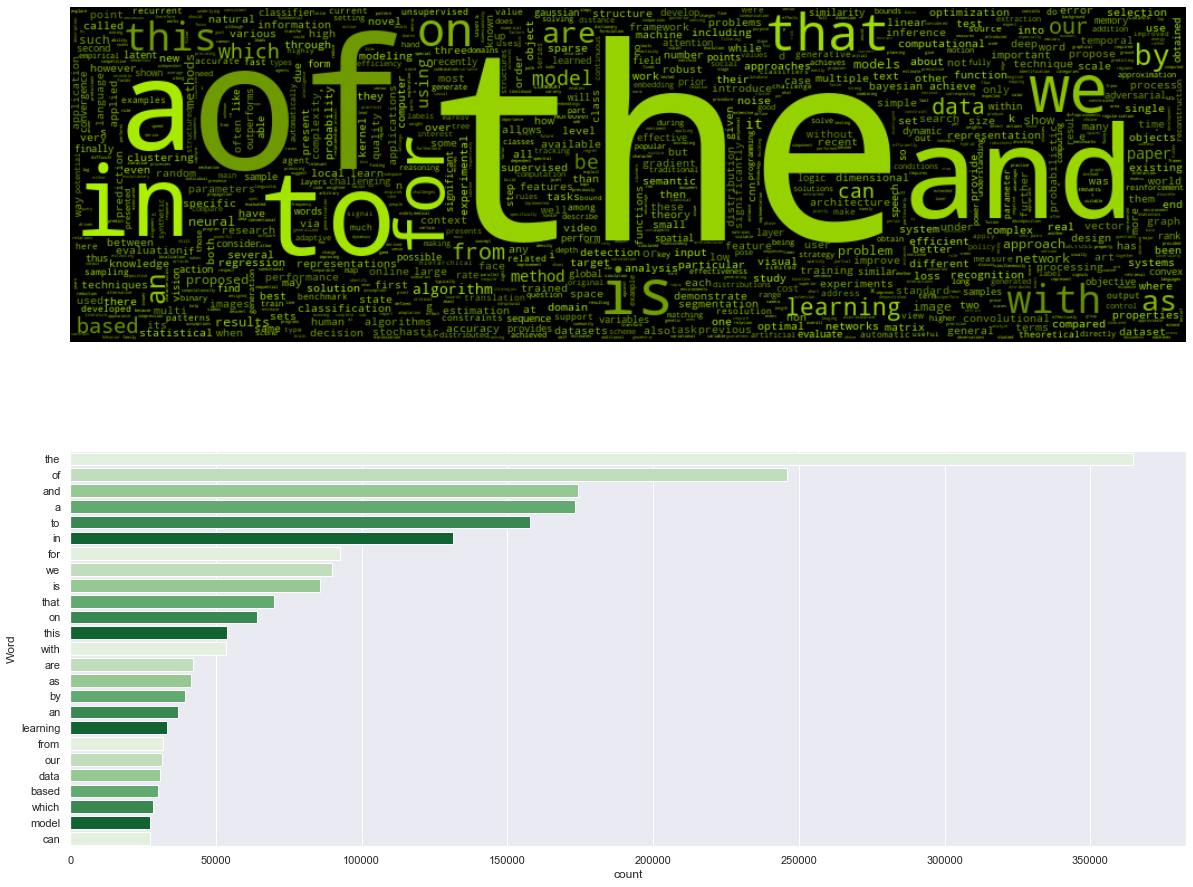

In [142]:
# plot 25 most frequent words including stop words
freq_words(arxivData['soup'], 25)

In [15]:
# stopwords-to compare text data with and without stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)
  
arxivData['soup'] = arxivData['soup'].apply(lambda x: remove_stopwords(x))

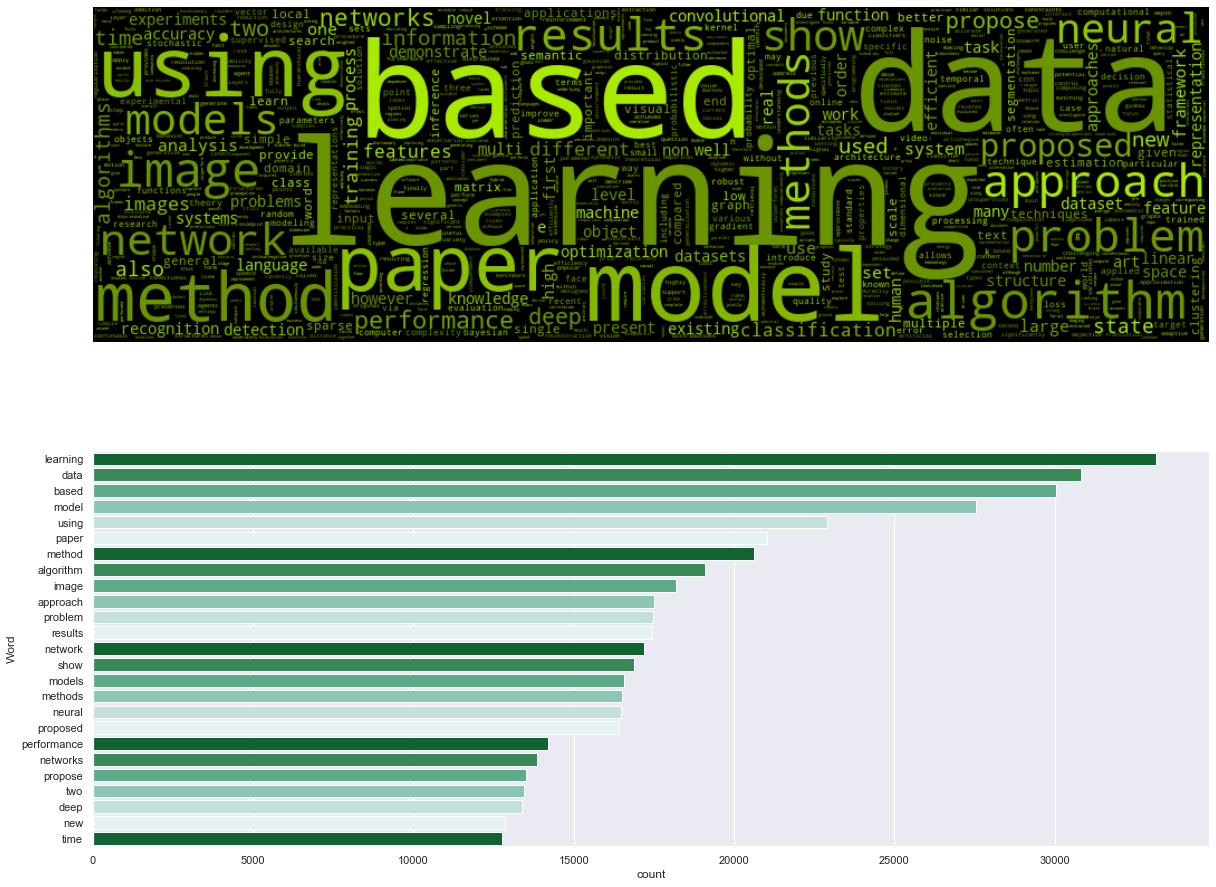

In [146]:
# plot 25 most frequent words without stopwords
freq_words(arxivData['soup'], 25)

In [16]:
# get all genre tags in a list
all_tags = sum(arxivData['tag'],[])
len(set(all_tags))

2167

In [17]:
all_tags = nltk.FreqDist(all_tags)
all_tags_df = pd.DataFrame({'Tag': list(all_tags.keys()), 'Count': list(all_tags.values())})

In [39]:
sorted_tags = all_tags_df.sort_values(by='Count', ascending=False)
sorted_tags.head(7)

,Tag,Count
2,cs.CV,13902
5,cs.LG,13734
0,cs.AI,10481
4,stat.ML,10241
1,cs.CL,6417
3,cs.NE,3817
21,cs.IR,1443


In [22]:
arxivData[['tag', 'year']].head()

,tag,year
0,"[cs.AI, cs.CL, cs.CV, cs.NE, stat.ML]",2018
1,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",2016
2,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",2016
3,"[stat.ML, cs.AI, cs.CL, cs.LG, cs.NE]",2017
4,"[cs.CL, cs.AI, cs.LG, cs.NE, stat.ML]",2017


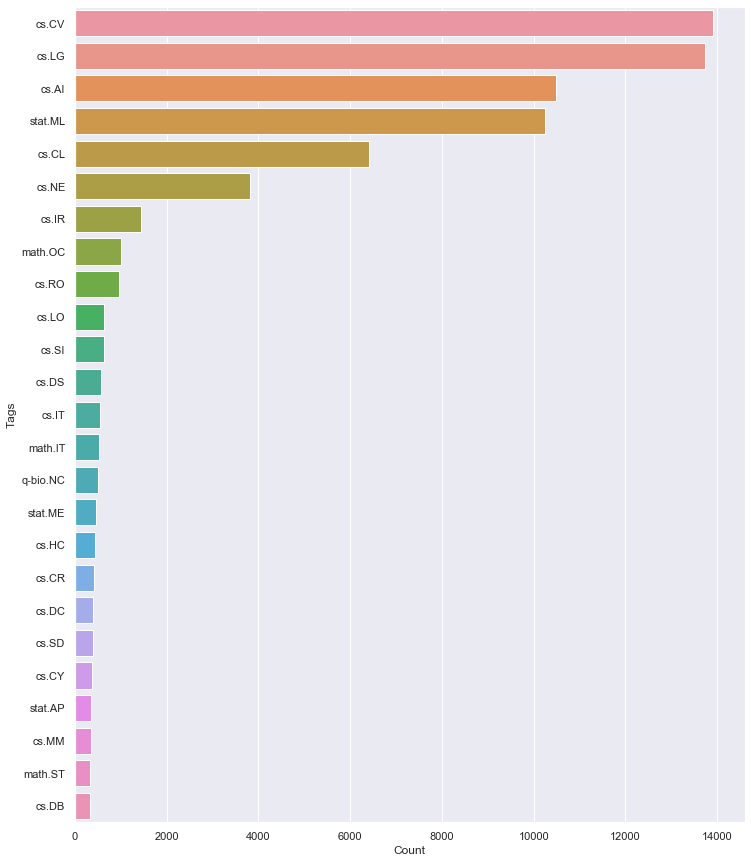

In [68]:
g = all_tags_df.nlargest(columns="Count", n = 25) 
plt.figure(figsize=(12,15))
ax = sns.barplot(data=g, x= "Count", y = "Tag")
ax.set(ylabel = 'Tags')
plt.show()

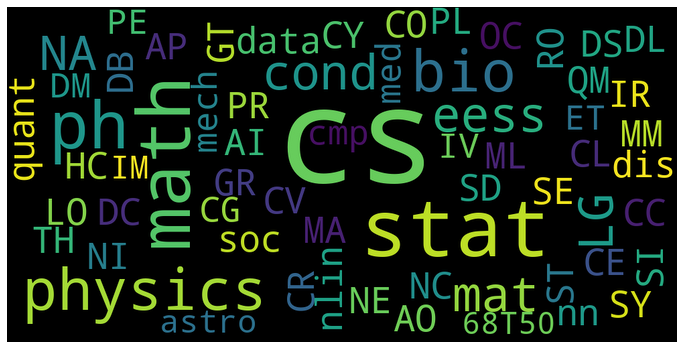

In [113]:
text = " ".join(review for review in g.Tag)
wordcloud = WordCloud(width=1000, height=500,max_font_size=200).generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='lanczos')
plt.axis("off")
plt.show()

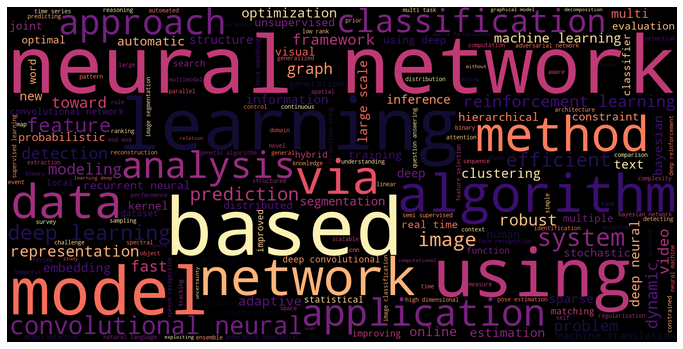

In [114]:
text = " ".join(review for review in arxivData.clean_title)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

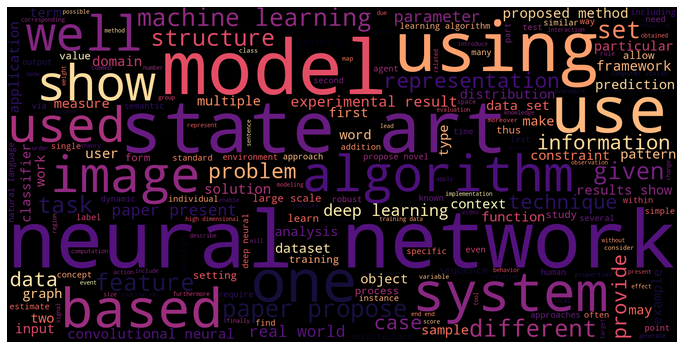

In [115]:
text = " ".join(review for review in arxivData.clean_summary)
wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(text)

plt.figure(figsize = (12, 10))
plt.imshow(wordcloud, interpolation='spline36')
plt.axis("off")
plt.show()

In [ ]:
wordcloud.to_file("first_review.png")

# Part 3: Heading to Machine Learning

This section includes: Text mining, classification, and recommender system. 

## 3.1. Text Mining Algorithms

In [15]:
# Lemmatization process
'''
Words in the third person are changed to first person and verbs in past and future tenses are changed into the present by the 
lemmatization process. 
'''
lemmatizer = WordNetLemmatizer()

def tokenize_and_lemmatize(text):
    # tokenization to ensure that punctuation is caught as its own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    lem = [lemmatizer.lemmatize(t) for t in filtered_tokens]
    return lem

In [16]:
# Defining a Count Vectorizer object
count_vec = CountVectorizer(stop_words='english', max_features=10000)
# Defining a TF-IDF Vectorizer
tfidf_vec = TfidfVectorizer(stop_words='english', ngram_range=(1, 2), tokenizer=tokenize_and_lemmatize, max_features=10000, use_idf=True)

In [16]:
arxivData.columns

Index(['author', 'link', 'summary', 'tag', 'title', 'year', 'clean_title',
       'clean_summary', 'soup'],
      dtype='object')

In [27]:
mb = MultiLabelBinarizer()
mb.fit(arxivData['tag'])

y = mb.transform(arxivData['tag'])

In [31]:
# Basic validation: splitting the data 80-20 train/test
X_train, X_test, y_train, y_test = train_test_split(arxivData['soup'], y, test_size=0.2, random_state=55)

In [32]:
# Tf-Idf transformation 
xtrain_tfidf = tfidf_vec.fit_transform(X_train)
xtest_tfidf = tfidf_vec.transform(X_test)
xtrain_tfidf.shape

(32800, 10000)

In [29]:
# Count Vectorizer transformation
xtrain_cv = count_vec.fit_transform(X_train)
xtest_cv = count_vec.transform(X_test)

In [26]:
xtrain_cv.shape

(32800, 10000)

In [70]:
# to hold model's results
evaluation_list=[]

## 3.2. Classification

### Logistic Regression

In [34]:
log_reg = LogisticRegression()
oneVsRest = OneVsRestClassifier(log_reg)
oneVsRest.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [35]:
y_pred = oneVsRest.predict(xtest_tfidf)

def get_performance(y_test, y_pred):
    # Evaluate Performance
    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)
    # Get precision, recall, f1 scores
    precision, recall, f1score, support = score(y_test, y_pred, average='micro')
    return accuracy, precision, recall, f1score

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 36.41
Precision : 0.8243419077169453
Recall    : 0.5110449242988334
F1-score   : 0.6309418929788945


In [73]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'Logistic Regression'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [38]:
mb.inverse_transform(y_pred)[16]

('cs.CV',)

### Multinomial Naive Bayes

In [48]:
nbayes = MultinomialNB()
oneVsRest_nb = OneVsRestClassifier(nbayes)
oneVsRest_nb.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                            fit_prior=True),
                    n_jobs=None)

In [74]:
y_pred = oneVsRest_nb.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 34.96
Precision : 0.798064705307399
Recall    : 0.5066393646066021
F1-score   : 0.6198049113751091


In [75]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'MultinomialNB'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [51]:
mb.inverse_transform(y_pred)[16]

('cs.CV',)

### Linear SVC

In [52]:
linear_svc = LinearSVC()
oneVsRest_svc = OneVsRestClassifier(linear_svc)
oneVsRest_svc.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                        fit_intercept=True, intercept_scaling=1,
                                        loss='squared_hinge', max_iter=1000,
                                        multi_class='ovr', penalty='l2',
                                        random_state=None, tol=0.0001,
                                        verbose=0),
                    n_jobs=None)

In [76]:
y_pred = oneVsRest_svc.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 35.33
Precision : 0.7723435732312245
Recall    : 0.5506949615289154
F1-score   : 0.6429528742710183


In [77]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'LinearSVC'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

In [55]:
mb.inverse_transform(y_pred)[16]

('cs.CV',)

### Random Forest

In [56]:
rforest = RandomForestClassifier(n_estimators=100)
oneVsRest_rf = OneVsRestClassifier(rforest)
oneVsRest_rf.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
                                              

In [78]:
y_pred = oneVsRest_rf.predict(xtest_tfidf)

# Performance metrics
accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 34.2
Precision : 0.8416398713826366
Recall    : 0.4547654504839911
F1-score   : 0.5904769577827909


In [79]:
# Add performance parameters to list
evaluation_list.append(dict([
    ('Model', 'RandomForestClassifier'),
    ('Test Accuracy', round(accuracy, 2)),
    ('Precision', round(precision, 2)),
    ('Recall', round(recall, 2)),
    ('F1', round(f1score, 2))
     ]))

### Performance metrics of models

In [80]:
results = pd.DataFrame(data=evaluation_list)
results = results[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
results = results.sort_values(by='Test Accuracy', ascending=False)
results = results.set_index('Model')
results

,Test Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,36.41,0.82,0.51,0.63
LinearSVC,35.33,0.77,0.55,0.64
MultinomialNB,34.96,0.80,0.51,0.62
RandomForestClassifier,34.20,0.84,0.45,0.59


### Optimization-GridSearch 

In [56]:
param = {'estimator__penalty':['l1', 'l2'], 'estimator__C':[0.001, 0.01, 1, 10]}

In [54]:
oneVsRest.get_params().keys()

dict_keys(['estimator__C', 'estimator__class_weight', 'estimator__dual', 'estimator__fit_intercept', 'estimator__intercept_scaling', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__multi_class', 'estimator__n_jobs', 'estimator__penalty', 'estimator__random_state', 'estimator__solver', 'estimator__tol', 'estimator__verbose', 'estimator__warm_start', 'estimator', 'n_jobs'])

In [57]:
# GridSearchCV
kf=KFold(n_splits=10, shuffle=True, random_state=55)
lr_grid = GridSearchCV(oneVsRest, param_grid = param, cv = kf, scoring='f1_micro', n_jobs=-1)
lr_grid.fit(xtrain_tfidf, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=55, shuffle=True),
             error_score='raise-deprecating',
             estimator=OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='warn',
                                                                        n_jobs=None,
                                                                        penalty='l2',
            

In [58]:
# examine the best model
print(lr_grid.best_score_)
print(lr_grid.best_params_)
print(lr_grid.best_estimator_)

0.6464523340977545
{'estimator__C': 10, 'estimator__penalty': 'l2'}
OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)


In [64]:
# Optimized Logistic Regression Model
log_reg = LogisticRegression(C=10, penalty='l2')
ovr = OneVsRestClassifier(log_reg)
ovr.fit(xtrain_tfidf, y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=10, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [65]:
# performance metrics of the optimized model
y_pred = ovr.predict(xtest_tfidf)

accuracy, precision, recall, f1score = get_performance(y_test, y_pred)
print(f'Test Accuracy Score of Basic Logistic Reg.: % {accuracy}')
print(f'Precision : {precision}')
print(f'Recall    : {recall}')
print(f'F1-score   : {f1score}')

Test Accuracy Score of Basic Logistic Reg.: % 35.06
Precision : 0.7702667477626206
Recall    : 0.5500744601638123
F1-score   : 0.6418099547511312


In [66]:
# Inference funct to handle new data that will come in the future
def infer_tags(text):
    text = clean_text(text)
    text = remove_stopwords(text)
    text_vec = tfidf_vec.transform([text])
    y_pred = ovr.predict(text_vec)
    return mb.inverse_transform(y_pred)

In [67]:
for i in range(10):
    sp = X_test.sample(1).index[0]
    print("Title: ", arxivData['title'][sp], "\nPredicted tag: ", infer_tags(X_test[sp])), print("Actual tag: ",arxivData['tag'][sp], "\n")   

Title:  Interactive Graphics for Visually Diagnosing Forest Classifiers in R 
Predicted tag:  [('cs.LG', 'stat.ML')]
Actual tag:  ['stat.ML'] 

Title:  Scalable Algorithms for Learning High-Dimensional Linear Mixed Models 
Predicted tag:  [('cs.LG', 'stat.ML')]
Actual tag:  ['stat.ML'] 

Title:  Bayesian Identification of Fixations, Saccades, and Smooth Pursuits 
Predicted tag:  [('cs.CV',)]
Actual tag:  ['cs.CV', 'I.5.1; I.6.4; J.7'] 

Title:  Bounds on the Number of Measurements for Reliable Compressive
  Classification 
Predicted tag:  [('cs.LG', 'math.IT', 'stat.ML')]
Actual tag:  ['cs.IT', 'cs.CV', 'math.IT', 'stat.ML'] 

Title:  Reflection Separation and Deblurring of Plenoptic Images 
Predicted tag:  [('cs.CV',)]
Actual tag:  ['cs.CV'] 

Title:  Rain Removal via Shrinkage-Based Sparse Coding and Learned Rain
  Dictionary 
Predicted tag:  [('cs.CV',)]
Actual tag:  ['cs.CV'] 

Title:  WeText: Scene Text Detection under Weak Supervision 
Predicted tag:  [('cs.CV',)]
Actual tag:  ['

# Article Recommendation Engine

## Recommender based on summary

In [18]:
arxivData['clean_summary'].head()

0    we propose an architecture for vqa which utili...
1    recent approaches based on artificial neural n...
2    we introduce the multiresolution recurrent neu...
3    multi task learning is motivated by the observ...
4    we present milabot a deep reinforcement learni...
Name: clean_summary, dtype: object

In [ ]:
# TfIdf matrix transformation on clean_summary column
tfidf_matrix = tfidf_vec.fit_transform(arxivData['clean_summary'])
# Compute the cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [24]:
indices = pd.Series(arxivData.index, index=arxivData['title']).drop_duplicates()

In [25]:
def get_recommendations(title, similarity):
    
    idx = indices[title]
    # pairwsie similarity scores
    sim_scores = list(enumerate(similarity[idx]))
    # sorting
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]

    article_indices = [i[0] for i in sim_scores]
    # Return the top 10 most related articles
    return arxivData[['link', 'title']].iloc[article_indices]

In [26]:
get_recommendations('Towards Bayesian Deep Learning: A Survey', cosine_sim)

,link,title
219,http://arxiv.org/abs/1608.06884v2,Towards Bayesian Deep Learning: A Framework an...
384,http://arxiv.org/abs/1709.05870v1,ZhuSuan: A Library for Bayesian Deep Learning
3617,http://arxiv.org/abs/1802.08717v1,Deep learning in radiology: an overview of the...
9916,http://arxiv.org/abs/1612.07139v3,Deep-learning in Mobile Robotics - from Percep...
36290,http://arxiv.org/abs/1202.4174v1,Perception Lie Paradox: Mathematically Proved ...
211,http://arxiv.org/abs/1504.00641v1,A Probabilistic Theory of Deep Learning
1234,http://arxiv.org/abs/1605.01369v2,Accelerating Deep Learning with Shrinkage and ...
22153,http://arxiv.org/abs/1506.02157v5,Dropout as a Bayesian Approximation: Appendix
2283,http://arxiv.org/abs/1801.06889v1,Visual Analytics in Deep Learning: An Interrog...
18856,http://arxiv.org/abs/1209.6195v1,Examples of Artificial Perceptions in Optical ...


## Recommender based on tags, author, and title

In [40]:
# convert all strings to lower case & strip names of spaces
def clean_lists(text):
    if isinstance(text, list):
        return [str.lower(i.replace(" ", "")) for i in text]
    else:
        if isinstance(text, str):
            return str.lower(text.replace(" ", ""))
        else:
            return ''

features = ['tag', 'author']
for feature in features:
    arxivData[feature] = arxivData[feature].apply(clean_lists)

In [18]:
# create soup to vectorization process
def create_soup(text):
    return ' '.join(text['tag']) + ' ' + ' '.join(text['author']) + ' ' + ' '.join(text['title'])

arxivData['soup2'] = arxivData.apply(create_soup, axis=1)

In [19]:
# CountVectorizer object's defined at the beginning of Part 3-text mining alg. section
count_matrix = count_vec.fit_transform(arxivData['soup2']) 
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [26]:
get_recommendations('Towards Bayesian Deep Learning: A Survey', cosine_sim2)

,link,title
12,http://arxiv.org/abs/1604.00289v3,Building Machines That Learn and Think Like Pe...
16,http://arxiv.org/abs/1409.6041v1,Domain Adaptive Neural Networks for Object Rec...
17,http://arxiv.org/abs/1506.01911v3,Beyond Temporal Pooling: Recurrence and Tempor...
18,http://arxiv.org/abs/1509.05962v2,Telugu OCR Framework using Deep Learning
21,http://arxiv.org/abs/1701.06106v2,Neurogenesis-Inspired Dictionary Learning: Onl...
22,http://arxiv.org/abs/1702.08690v2,Borrowing Treasures from the Wealthy: Deep Tra...
23,http://arxiv.org/abs/1704.00260v2,Aligned Image-Word Representations Improve Ind...
29,http://arxiv.org/abs/1710.05381v1,A systematic study of the class imbalance prob...
30,http://arxiv.org/abs/1710.10686v1,Regularization for Deep Learning: A Taxonomy
31,http://arxiv.org/abs/1801.07648v1,Clustering with Deep Learning: Taxonomy and Ne...


In [27]:
get_recommendations('A Deep Reinforcement Learning Chatbot', cosine_sim2)

,link,title
4,http://arxiv.org/abs/1709.02349v2,A Deep Reinforcement Learning Chatbot
5,http://arxiv.org/abs/1709.08878v1,Generating Sentences by Editing Prototypes
6,http://arxiv.org/abs/1801.06700v1,A Deep Reinforcement Learning Chatbot (Short V...
1,http://arxiv.org/abs/1603.03827v1,Sequential Short-Text Classification with Recu...
3,http://arxiv.org/abs/1705.08142v2,Learning what to share between loosely related...
438,http://arxiv.org/abs/1710.10704v3,Training Probabilistic Spiking Neural Networks...
42,http://arxiv.org/abs/1610.06454v2,Reasoning with Memory Augmented Neural Network...
47,http://arxiv.org/abs/1705.10929v1,Adversarial Generation of Natural Language
49,http://arxiv.org/abs/1709.06990v1,Text Compression for Sentiment Analysis via Ev...
50,http://arxiv.org/abs/1712.03133v1,Building competitive direct acoustics-to-word ...
